<img src="https://cdn.siberian.dev/siberian.png" alt="Siberian Logo">

# ElasticNet with MinMaxScaler & Power Transformer

This Code template is for Regression tasks using a ElasticNet based on the Regression linear model Technique with MinMaxScaler and feature transformation technique PowerTransformer in a pipeline

### Required Packages

In [1]:
import warnings as wr
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt 
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import MinMaxScaler,PowerTransformer
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import ElasticNet
from sklearn.metrics import mean_squared_error, r2_score,mean_absolute_error
wr.filterwarnings('ignore')

### Initialization

Filepath of CSV file

In [2]:
#filepath
file_path= ""

List of features which are  required for model training .

In [3]:
#x_values
features=[]

Target feature for prediction.

In [4]:
#y_value
target=''

### Data Fetching

Pandas is an open-source, BSD-licensed library providing high-performance, easy-to-use data manipulation and data analysis tools.

We will use panda's library to read the CSV file using its storage path.And we use the head function to display the initial row or entry.

In [5]:
df=pd.read_csv(file_path) #reading file
df.head()

,AT,V,AP,RH,PE
0,14.96,41.76,1024.07,73.17,463.26
1,25.18,62.96,1020.04,59.08,444.37
2,5.11,39.40,1012.16,92.14,488.56
3,20.86,57.32,1010.24,76.64,446.48
4,10.82,37.50,1009.23,96.62,473.90


### Data Preprocessing

Since the majority of the machine learning models in the Sklearn library doesn't handle string category data and Null value, we have to explicitly remove or replace null values. The below snippet have functions, which removes the null value if any exists. And convert the string classes data in the datasets by encoding them to integer classes.


In [6]:
def NullClearner(df):
    if(isinstance(df, pd.Series) and (df.dtype in ["float64","int64"])):
        df.fillna(df.mean(),inplace=True)
        return df
    elif(isinstance(df, pd.Series)):
        df.fillna(df.mode()[0],inplace=True)
        return df
    else:return df
def EncodeX(df):
    return pd.get_dummies(df)

#### Correlation Map

In order to check the correlation between the features, we will plot a correlation matrix. It is effective in summarizing a large amount of data where the goal is to see patterns.

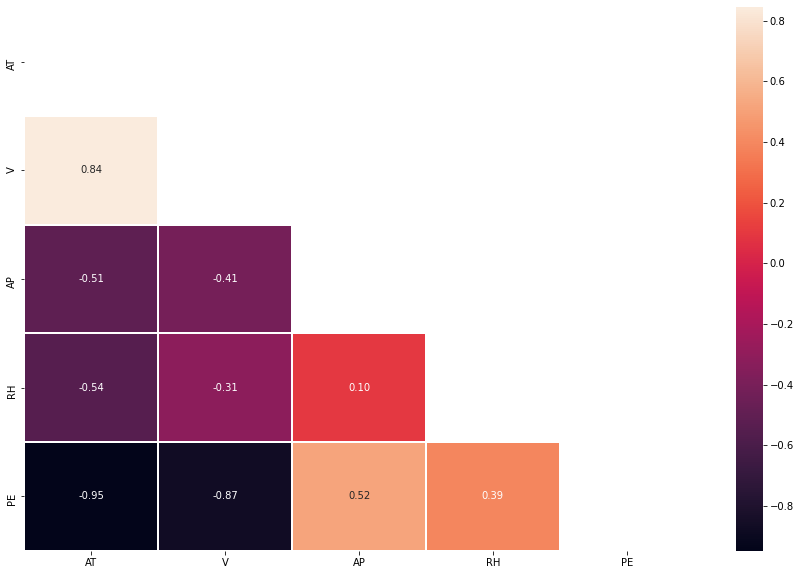

In [7]:
plt.figure(figsize = (15, 10))
corr = df.corr()
mask = np.triu(np.ones_like(corr, dtype = bool))
sns.heatmap(corr, mask = mask, linewidths = 1, annot = True, fmt = ".2f")
plt.show()

### Feature Selections

It is the process of reducing the number of input variables when developing a predictive model. Used to reduce the number of input variables to both reduce the computational cost of modelling and, in some cases, to improve the performance of the model.

We will assign all the required input features to X and target/outcome to Y.

In [8]:
#spliting data into X(features) and Y(Target)
X=df[features]
Y=df[target]  

Calling preprocessing functions on the feature and target set.

In [9]:
x=X.columns.to_list()
for i in x:
    X[i]=NullClearner(X[i])
X=EncodeX(X)
Y=NullClearner(Y)
X.head()

,AT,V,AP,RH
0,14.96,41.76,1024.07,73.17
1,25.18,62.96,1020.04,59.08
2,5.11,39.40,1012.16,92.14
3,20.86,57.32,1010.24,76.64
4,10.82,37.50,1009.23,96.62


### Data Splitting

The train-test split is a procedure for evaluating the performance of an algorithm. The procedure involves taking a dataset and dividing it into two subsets. The first subset is utilized to fit/train the model. The second subset is used for prediction. The main motive is to estimate the performance of the model on new data.

In [10]:
#we can choose randomstate and test_size as over requerment
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 12) #performing datasplitting

### Data Rescaling
MinMaxScaler subtracts the minimum value in the feature and then divides by the range, where range is the difference between the original maximum and original minimum.

We will fit an object of MinMaxScaler to train data then transform the same data via fit_transform(X_train) method, following which we will transform test data via transform(X_test) method.

### Feature Transformation
Apply a power transform featurewise to make data more Gaussian-like.

Power transforms are a family of parametric, monotonic transformations that are applied to make data more Gaussian-like. This is useful for modeling issues related to heteroscedasticity (non-constant variance), or other situations where normality is desired.

### Model

Elastic Net first emerged as a result of critique on Lasso, whose variable selection can be too dependent on data and thus unstable. The solution is to combine the penalties of Ridge regression and Lasso to get the best of both worlds.

**Features of ElasticNet Regression-**
* It combines the L1 and L2 approaches.
* It performs a more efficient regularization process.
* It has two parameters to be set, λ and α.

 #### Model Tuning Parameters

    1. alpha : float, default=1.0
    
> Constant that multiplies the penalty terms. Defaults to 1.0. See the notes for the exact mathematical meaning of this parameter. alpha = 0 is equivalent to an ordinary least square, solved by the LinearRegression object. For numerical reasons, using alpha = 0 with the Lasso object is not advised. Given this, you should use the LinearRegression object.


    2. l1_ratio : float, default=0.5
> The ElasticNet mixing parameter, with 0 <= l1_ratio <= 1. For l1_ratio = 0 the penalty is an L2 penalty. For l1_ratio = 1 it is an L1 penalty. For 0 < l1_ratio < 1, the penalty is a combination of L1 and L2.

    3. normalize : bool, default=False
>This parameter is ignored when fit_intercept is set to False. If True, the regressors X will be normalized before regression by subtracting the mean and dividing by the l2-norm. If you wish to standardize, please use StandardScaler before calling fit on an estimator with normalize=False.

    4. max_iter : int, default=1000
>The maximum number of iterations.

    5. tol : float, default=1e-4
>The tolerance for the optimization: if the updates are smaller than tol, the optimization code checks the dual gap for optimality and continues until it is smaller than tol.

    6. selection : {‘cyclic’, ‘random’}, default=’cyclic’
>If set to ‘random’, a random coefficient is updated every iteration rather than looping over features sequentially by default. This (setting to ‘random’) often leads to significantly faster convergence especially when tol is higher than 1e-4.


In [11]:
model = make_pipeline(MinMaxScaler(),PowerTransformer(), ElasticNet(random_state = 42))
model.fit(X_train, y_train)

Pipeline(memory=None,
         steps=[('minmaxscaler', MinMaxScaler(copy=True, feature_range=(0, 1))),
                ('powertransformer',
                 PowerTransformer(copy=True, method='yeo-johnson',
                                  standardize=True)),
                ('elasticnet',
                 ElasticNet(alpha=1.0, copy_X=True, fit_intercept=True,
                            l1_ratio=0.5, max_iter=1000, normalize=False,
                            positive=False, precompute=False, random_state=42,
                            selection='cyclic', tol=0.0001,
                            warm_start=False))],
         verbose=False)

#### Model Accuracy
score() method return the mean accuracy on the given test data and labels.

In multi-label classification, this is the subset accuracy which is a harsh metric since you require for each sample that each label set be correctly predicted.

In [12]:
print("Accuracy score {:.2f} %\n".format(model.score(X_test,y_test)*100))

Accuracy score 86.42 %



In [13]:
#prediction on testing set
prediction=model.predict(X_test)

### Model evolution


**r2_score:** The r2_score function computes the percentage variablility explained by our model, either the fraction or the count of correct predictions.

**MAE:** The mean abosolute error function calculates the amount of total error(absolute average distance between the real data and the predicted data) by our model.

**MSE:** The mean squared error function squares the error(penalizes the model for large errors) by our model.

In [14]:
print('Mean Absolute Error:', mean_absolute_error(y_test, prediction))  
print('Mean Squared Error:', mean_squared_error(y_test, prediction))  
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(y_test, prediction)))

Mean Absolute Error: 5.144749259689901
Mean Squared Error: 40.63079858326387
Root Mean Squared Error: 6.3742292540560435


In [15]:
print("R-squared score : ",r2_score(y_test,prediction))

R-squared score :  0.8641886369952442


#### Prediction Plot

First, we make use of a plot to plot the actual observations, with x_train on the x-axis and y_train on the y-axis.
For the regression line, we will use x_train on the x-axis and then the predictions of the x_train observations on the y-axis.

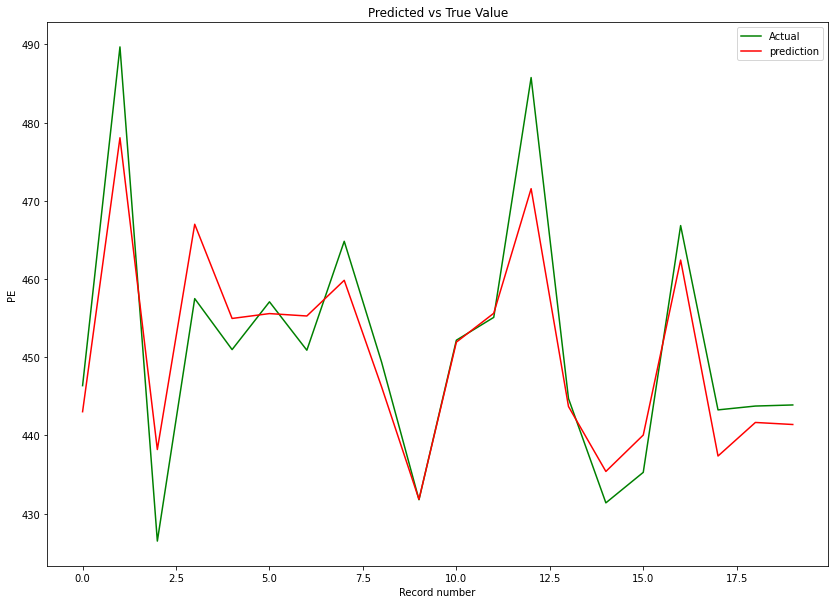

In [16]:
plt.figure(figsize=(14,10))
plt.plot(range(20),y_test[0:20], color = "green")
plt.plot(range(20),model.predict(X_test[0:20]), color = "red")
plt.legend(["Actual","prediction"]) 
plt.title("Predicted vs True Value")
plt.xlabel("Record number")
plt.ylabel(target)
plt.show()

#### Creator: Ganapathi Thota , Github: [Profile](https://github.com/Shikiz)